In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from tqdm import tqdm, tqdm_notebook

from konlpy.tag import Okt, Twitter, Kkma, Hannanum, Komoran

In [2]:
import nltk
from nltk.corpus import wordnet

from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


In [204]:
# nltk.download()

In [71]:
dic_path = r"C:\Users\Jwp\Desktop\workspace\Final_project\DataScience\Final_Data\emotion_dictionary"
review_path = r"C:\Users\Jwp\Desktop\workspace\Final_project\DataScience\Final_Data\movie\movieReview"

In [72]:
dic = pd.read_csv(os.path.join(dic_path, "emotion_dic_mod.csv"), encoding="euc-kr")

In [77]:
len(dic)

433

In [73]:
dic.emotion.unique()

array(['감동', '공포', '분노', '슬픔', '유쾌', '지루함'], dtype=object)

In [74]:
titan = pd.read_csv(os.path.join(review_path, "19980074_타이타닉.csv"), encoding="utf-8")
transformer = pd.read_csv(os.path.join(review_path, "20070061_트랜스포머.csv"), encoding="utf-8")
avatar = pd.read_csv(os.path.join(review_path, "20090834_아바타.csv"), encoding="utf-8")
gwanhae = pd.read_csv(os.path.join(review_path, "20124079_광해, 왕이 된 남자.csv"), encoding="utf-8")
myungrang = pd.read_csv(os.path.join(review_path, "20129370_명량.csv"), encoding="utf-8")
haeundae = pd.read_csv(os.path.join(review_path, "20090074_해운대.csv"), encoding="utf-8")
interstella = pd.read_csv(os.path.join(review_path, "20149120_인터스텔라.csv"), encoding="utf-8")
kisangchung = pd.read_csv(os.path.join(review_path, "20183782_기생충.csv"), encoding="utf-8")
sevenbang = pd.read_csv(os.path.join(review_path, "20127593_7번방의 선물.csv"), encoding="utf-8")

In [75]:
def get_emotion_score(emotion_dic, data):
    
    data = data.fillna("")
    
    ls = []
    for i in data.review:
        if len(i) > 20:
            ls.append(i)

    emotions = np.zeros(6)
    
    for j in tqdm(range(len(ls))):
        check = np.zeros(6)
        for i in range(len(dic.word)):
            if dic.word[i] in ls[j]:
                if dic.emotion[i] == "감동":
                    if check[0] == 0:
                        emotions[0] += 1
                    check[0] = 1
                if dic.emotion[i] == "공포":
                    if check[1] == 0:
                        emotions[1] += 1
                    check[1] = 1
                if dic.emotion[i] == "분노":
                    if check[2] == 0:
                        emotions[2] += 1
                    check[2] = 1
                if dic.emotion[i] == "슬픔":
                    if check[3] == 0:
                        emotions[3] += 1
                    check[3] = 1
                if dic.emotion[i] == "유쾌":
                    if check[4] == 0:
                        emotions[4] += 1
                    check[4] = 1
                if dic.emotion[i] == "지루함":
                    if check[5] == 0:
                        emotions[5] += 1
                    check[5] = 1

    result = np.round(emotions/emotions.sum()*100).astype(int)
    print(emotions)
    
    return result

In [76]:
titan_score = get_emotion_score(dic, titan)

100%|███████████████████████████████████████████████████████████████████████████| 10604/10604 [01:14<00:00, 142.49it/s]


[5996.   81.  733. 1130.  657.  249.]


In [78]:
df_titan = pd.DataFrame([dic.emotion.unique(), titan_score], index=["emotion", "score"]).T
df_titan

,emotion,score
0,감동,68
1,공포,1
2,분노,8
3,슬픔,13
4,유쾌,7
5,지루함,3


In [28]:
df_titan = pd.DataFrame([dic.emotion.unique(), titan_score], index=["emotion", "score"]).T
df_titan

,emotion,score
0,감동,67
1,공포,1
2,분노,9
3,슬픔,13
4,유쾌,8
5,지루함,3


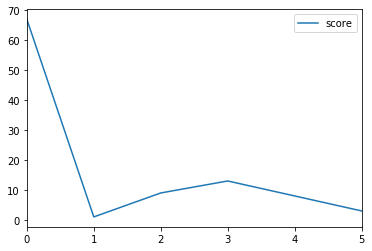

In [29]:
df_titan.plot()

In [30]:
transformer_score = get_emotion_score(dic, transformer)

100%|███████████████████████████████████████████████████████████████████████████| 14416/14416 [01:28<00:00, 162.90it/s]


In [31]:
df_transformer = pd.DataFrame([dic.emotion.unique(), transformer_score], index=["emotion", "score"]).T
df_transformer

,emotion,score
0,감동,36
1,공포,4
2,분노,9
3,슬픔,12
4,유쾌,31
5,지루함,8


In [182]:
df_transformer = pd.DataFrame([dic.emotion.unique(), transformer_score], index=["emotion", "score"]).T
df_transformer

,emotion,score
0,공포,3
1,분노,5
2,슬픔,30
3,재미,58
4,지루함,4
5,혐오,1


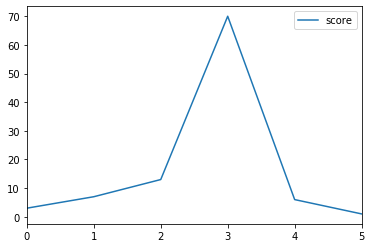

In [220]:
df_transformer.plot()

In [32]:
avatar_score = get_emotion_score(dic, avatar)

100%|███████████████████████████████████████████████████████████████████████████| 25967/25967 [02:41<00:00, 161.02it/s]


In [33]:
df_avatar = pd.DataFrame([dic.emotion.unique(), avatar_score], index=["emotion", "score"]).T
df_avatar

,emotion,score
0,감동,37
1,공포,2
2,분노,9
3,슬픔,13
4,유쾌,29
5,지루함,10


In [222]:
df_avatar = pd.DataFrame([dic.emotion.unique(), avatar_score], index=["emotion", "score"]).T
df_avatar

,emotion,score
0,공포,2
1,분노,7
2,슬픔,14
3,재미,69
4,지루함,7
5,혐오,1


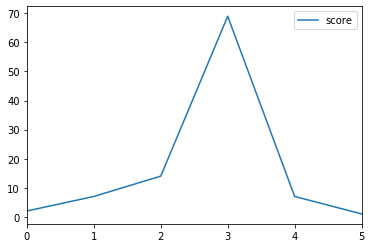

In [223]:
df_avatar.plot()

In [59]:
gwanhae_score = get_emotion_score(dic, gwanhae)

100%|███████████████████████████████████████████████████████████████████████████| 17124/17124 [01:52<00:00, 152.79it/s]


[6411.  331.  958. 2361. 5287. 1033.]


In [35]:
df_gwanhae = pd.DataFrame([dic.emotion.unique(), gwanhae_score], index=["emotion", "score"]).T
df_gwanhae

,emotion,score
0,감동,39
1,공포,2
2,분노,6
3,슬픔,14
4,유쾌,32
5,지루함,6


In [186]:
df_gwanhae = pd.DataFrame([dic.emotion.unique(), gwanhae_score], index=["emotion", "score"]).T
df_gwanhae

,emotion,score
0,공포,2
1,분노,3
2,슬픔,34
3,재미,58
4,지루함,3
5,혐오,1


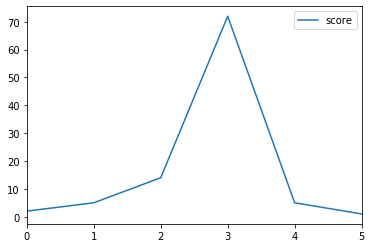

In [227]:
df_gwanhae.plot()

In [36]:
myungrang_score = get_emotion_score(dic, myungrang)

100%|███████████████████████████████████████████████████████████████████████████| 55022/55022 [05:46<00:00, 158.65it/s]


In [37]:
df_myungrang = pd.DataFrame([dic.emotion.unique(), myungrang_score], index=["emotion", "score"]).T
df_myungrang

,emotion,score
0,감동,35
1,공포,5
2,분노,9
3,슬픔,16
4,유쾌,26
5,지루함,9


In [188]:
df_myungrang = pd.DataFrame([dic.emotion.unique(), myungrang_score], index=["emotion", "score"]).T
df_myungrang

,emotion,score
0,공포,3
1,분노,3
2,슬픔,31
3,재미,58
4,지루함,3
5,혐오,1


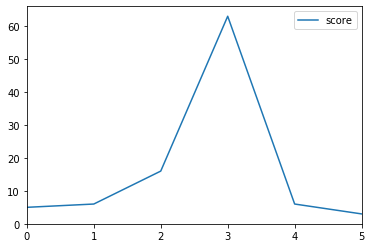

In [232]:
df_myungrang.plot()

In [40]:
haeundae_score = get_emotion_score(dic, haeundae)
interstella_score = get_emotion_score(dic, interstella)
kisangchung_score = get_emotion_score(dic, kisangchung)

100%|███████████████████████████████████████████████████████████████████████████| 25658/25658 [03:28<00:00, 123.22it/s]


In [41]:
df_haeundae = pd.DataFrame([dic.emotion.unique(), haeundae_score], index=["emotion", "score"]).T
df_haeundae

,emotion,score
0,감동,32
1,공포,3
2,분노,8
3,슬픔,17
4,유쾌,31
5,지루함,10


In [42]:
df_interstella = pd.DataFrame([dic.emotion.unique(), interstella_score], index=["emotion", "score"]).T
df_interstella

,emotion,score
0,감동,39
1,공포,3
2,분노,11
3,슬픔,13
4,유쾌,24
5,지루함,10


In [43]:
df_kisangchung = pd.DataFrame([dic.emotion.unique(), kisangchung_score], index=["emotion", "score"]).T
df_kisangchung

,emotion,score
0,감동,20
1,공포,10
2,분노,19
3,슬픔,19
4,유쾌,25
5,지루함,8


In [79]:
sevenbang_score = get_emotion_score(dic, sevenbang)

100%|███████████████████████████████████████████████████████████████████████████| 27411/27411 [03:34<00:00, 127.58it/s]


[15508.   189.  2029.  6340.  6493.  1066.]


In [70]:
df_sevenbang = pd.DataFrame([dic.emotion.unique(), sevenbang_score], index=["emotion", "score"]).T
df_sevenbang

,emotion,score
0,감동,44
1,공포,1
2,분노,7
3,슬픔,22
4,유쾌,23
5,지루함,4


In [53]:
data = haeundae.fillna("")
    
ls = []
for i in data.review:
    if len(i) > 20:
        ls.append(i)

In [56]:
 c = 0
for i in ls:
    if "100점" in i:
        c+=1

In [57]:
c, len(ls)

(15, 17828)

In [ ]:
# words = []
# for i in range(len(text)):
#     word = okt.morphs(text[i], stem=True)
#     words.append(word)

# def remove_end_txt(text):
#     words = []
#     for i in range(len(text)):
#         word = text[i].replace("이다", "").replace("하다", "").replace("되다", "").replace("스럽다", "").replace("나다", "").replace("거리다", "").replace("다", "")
#         words.append(word)
#     return words

In [ ]:
# words = remove_end_txt(dic.단어)

In [62]:
# for i in range(len(dic)):
#     print(kkma.pos(dic.단어[i])[0][0])

In [63]:
# for i in range(len(dic)):
#     print(kkma.pos(dic.단어[i]))

In [64]:
# kkma.tagset

In [ ]:
# okt.morphs('너무 재미가 없다', stem=True)